In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import torch

from model import DenoiseDiffusion, UNet


__author__ = "__Girish_Hegde__"


In [2]:
# =============================================================
# Parameters
# =============================================================
CKPT = Path('./data/runs/ckpt.pt')
DEVICE = torch.device('cuda')
CHANNELS = 3

In [3]:
# =============================================================
# Load Checkpoint
# =============================================================
ckpt = torch.load(CKPT, map_location='cpu')
net = UNet(**ckpt['net']['config'])
net.load_state_dict(ckpt['net']['state_dict'])
net.eval()
net.to(DEVICE)
timesteps = ckpt['kwargs']['timesteps']
imgsize = ckpt['kwargs']['img_size']
denoiser = DenoiseDiffusion(net, timesteps=timesteps)

In [4]:
# =============================================================
# Sample Images
# =============================================================
samples = denoiser.reverse_sample(xt=None, shape=(64, CHANNELS, imgsize, imgsize), return_timesteps=True)
samples = samples.permute(0, 1, 3, 4, 2).cpu()

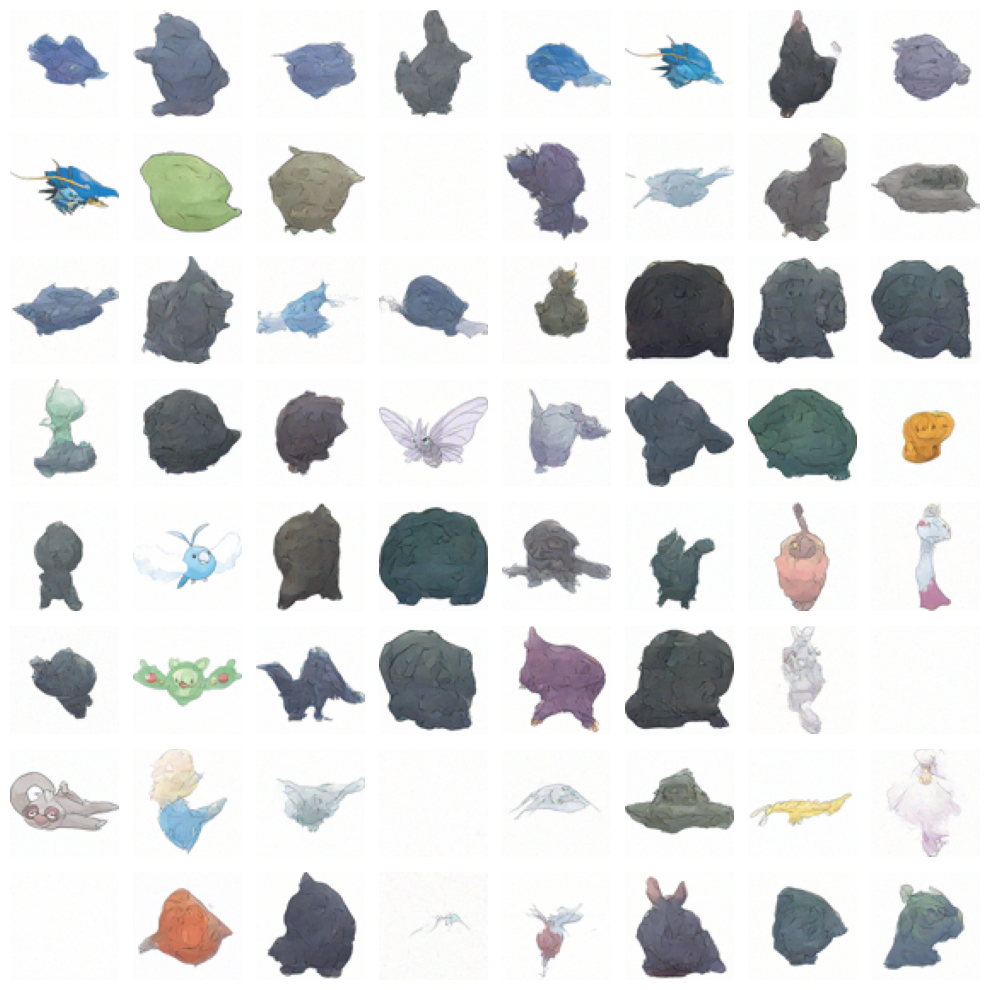

In [5]:
# =============================================================
# Make Grid
# =============================================================
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(10, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = samples[-1, i]
    img = (img*0.5) + 0.5
    img = img.clamp(0, 1)
    # img = (img - img.min())/(img.max() - img.min())
    ax.imshow(img)
    ax.axis('off')

# =============================================================
# Save and Plot Samples
# =============================================================
plt.tight_layout()
# fig.savefig(CKPT.parent/'samples.png')
plt.show()

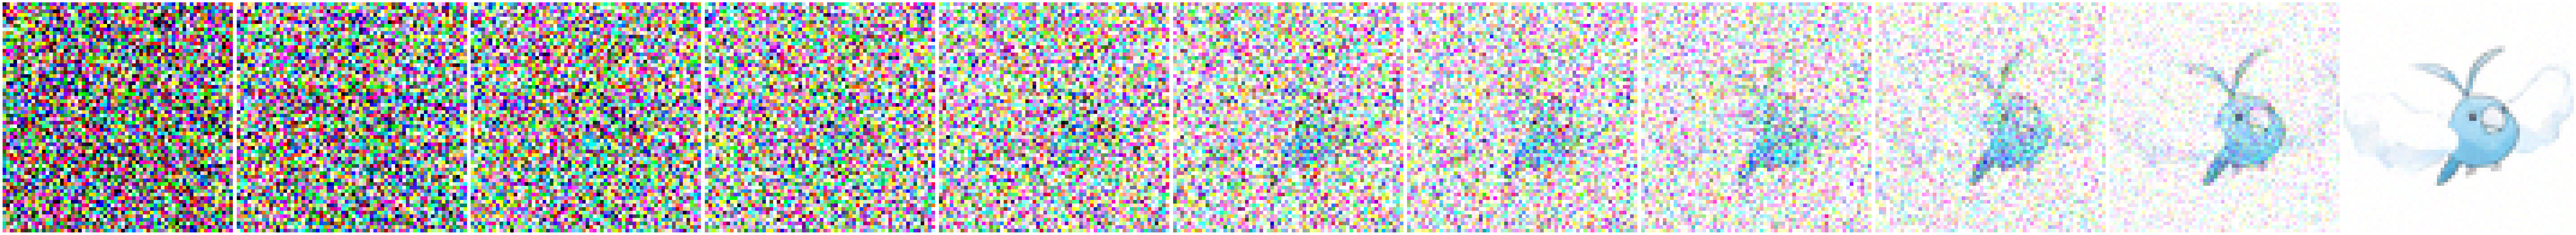

In [8]:
# =============================================================
# Plot Denoising
# =============================================================
fig, axes = plt.subplots(nrows=1, ncols=timesteps//10 + 1, figsize=(100, 100))
axes = axes.flatten()
idx = 33
for i, ax in enumerate(axes):
    img = samples[i*10, idx]
    img = img*0.5 + 0.5
    img = img.clamp(0, 1)
    # img = (img - img.min())/(img.max() - img.min())
    ax.imshow(img)
    ax.axis('off')

# =============================================================
# Save and Plot Denoising Visualization
# =============================================================
plt.tight_layout()
# fig.savefig(CKPT.parent/'denoising.png')
plt.show()

# =============================================================
# END
# =============================================================